# Juliaの数値計算のTutorial

ここではJuliaの数値計算についてのTutorialを行う。
まずJuliaという言語の利点について、個人的な感想を以下を挙げる。
- 環境構築が楽。(個人的にはpythonより楽だと思う。)
- pythonよりも簡単に高速化出来る
- コードを短く書けるので、バグを生み出しにくい。
- Jupyter notebookで使えるので、研究ノートの中で数値計算が出来る。(考えをまとめやすいし、他の人と議論する際に楽)
- Jupyter notebookで小分けに実行できるのでデバッグも比較的簡単
- 同じコードの中でグラフを出力できる。

割と万能であるように思うが、１つの数値計算で2週間とかかかるようになったら、もしかしたらもう少し早いとされるc++に切り替えた方が良いのかもしれない。
しかし、特に多くの人に対しては、コーディング＋デバッグにかかる時間を加味して、Juliaで書いた方が早いように思う。
以下、簡単なサンプルコードと共に、Juliaにおける数値計算を学習していこう。

## 1. Juliaの導入・環境構築

このノートが見られている時点でJuliaの導入は済んでいるはずなのでパッケージの管理から行っていく。
Juliaは、非常にパッケージ(ライブラリ)の管理が楽である。内部のコマンドで`Pkg.add("~")`でパーケージ管理を行う事が出来ます。
これが見れている人は、多分全部パッケージを入れている気がするので、実行しなくてもよいかもしれない。(ちなみにJupyter notebookのセルはctrl+enterで実行可能)
僕がよく使うのは"LinearAlgebra","IJulia"(jupyter notebook開くのに必要),"Plots", "Flux", "Distributions", "DataFrames", "CSV"です。tutorial3の最後まで読めば、一応全部使います。
(*jupyter notebookで描画(Plots)を使う際は、先にjuliaのパッケージモードで``add Plots``, ``add IJulia``をした後に``build()``をしておく必要があります。     2023/04/01追記  )

In [ ]:
import Pkg
using Pkg
Pkg.add("IJulia")
Pkg.add("LinearAlgebra")
Pkg.add("PyPlot")
Pkg.add("BenchmarkTools")
Pkg.build("PyCall")

## 2. Hamiltonianの分散関係を確認する

次に教育的な練習問題として、ハミルトニアンの分散関係を解いて、グラフで可視化してみよう。

In [1]:
# parameters
t = 1.0
lamda = 0.5
mu = 0.0
K_SIZE = 100

100

```
function A(B, C, ..)
    ~~
    return X
end
```
で、B,C,...を変数として、計算したXを返す、Aという関数を定義できる。

In [2]:
# Hamiltonianを定義する
using LinearAlgebra

#
function Ham(k)
    H=[-t*(cos(k[1])+cos(k[2]))+mu lamda*(-sin(k[2])-im*sin(k[1]))
    lamda*(-sin(k[2])+im*sin(k[1])) -t*(cos(k[1])+cos(k[2]))+mu]
    Hermitian(H) #ちゃんとHermiteにする関数。無くてもいい。
    return H
end
# 純虚数はim
# 行列（２次元配列）は上記のような形で書くことが出来る。要素の間は空白(スペース)で区切り、行の間はenterで区切る。(enterの代わりに「;」で区切ってもよい。)
# 一方で１次元配列を代入する時は、要素の間は「,」で区切るので注意
# Juliaの配列は1から始まるので注意

Ham (generic function with 1 method)

In [3]:
# 分散関係をみる波数空間上の領域を決める
q = collect(0:pi/K_SIZE:4pi) #collect(a,b,c)でa~cまでをb刻みの配列を用意する
a = collect(0:pi/K_SIZE:pi)
s = length(a)

#中身(要素)がゼロでサイズが4*K_SIZEの配列を用意する。各k点でのエネルギー固有値を格納したい。
# Juliaだと数と変数の掛け算は"*"が要らない。便利だけど時々ドキッとする。
e1 = zeros(Float64,4K_SIZE) 
e2 = zeros(Float64,4K_SIZE)

#高対称線上でのハミルトニアンとその固有値を計算し、e1,e2に格納する。

# Γ(0,0) => X(pi,0)
for i = 1:s #iに１～ｓまでの値を代入しながらループを回す
    e,v = eigen(Ham([a[i],0]))
    e1[i] = e[1]
    e2[i] = e[2]
end
# X(pi,0) => X'(0,pi)
for i = 1:s
    e,v = eigen(Ham([pi-a[i],a[i]]))
    e1[i+s] = e[1]
    e2[i+s] = e[2]
end
# X'(0,pi) => Γ(0,0)
for i = 1:s
    e,v = eigen(Ham([0,pi-a[i]]))
    e1[i+2s] = e[1]
    e2[i+2s] = e[2]
end
# Γ(0,0) => M(pi,pi)
for i = 1:s
    e,v = eigen(Ham([a[i],a[i]]))
    e1[i+3s] = e[1]
    e2[i+3s] = e[2]
end

Plotsを使う場合は、Plotの仕方は大体[このサイト](https://qiita.com/I_ppp/items/dca3552affa6a672e4bd)に書いてある。
元Pythonユーザーの人は、PyPlotを使った方が楽かもしれない(書き方がmatplotlibと同じなので)

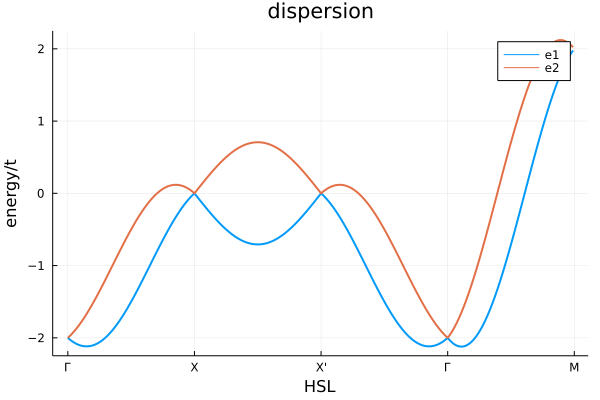

In [10]:
using Plots

plot(q, e1, xticks=([0,pi,2pi,3pi,4pi],["Γ", "X", "X'", "Γ", "M"]),xlabel="HSL",ylabel="energy/t",label="e1",title="dispersion", width=2.0)
plot!(q, e2,label="e2", width=2.0)

#grid(true)

# 番外編：数値計算結果をデータとして残そう
研究倫理の観点から、研究データは論文を書いてから10年間原則保持する事が、日本学術会議により推奨されています。

数値計算の場合、データとは「実行するコード」・「数値計算結果」・「それにより描かれたグラフ」が相当すると思います。
今回のこのJupyter Notebookでは開いている限りはそれが保持されている(一度閉じてしまうとグラフは残るが数値計算結果(配列の中身)は保持されない)のですが、倫理の観点や、後にグラフを書き直す場合の為に数値計算結果をデータとして出力することも覚えておきましょう。

c++とかを使っていた人は、おそらく.datファイルや.txtファイルに出力していたと思うが、Juliaではライブラリが充実しているため、おそらく.csvファイルに出力orから読み込むのが楽である。まず必要なパッケージをダウンロードしよう。

In [ ]:
import Pkg
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")

In [16]:
using DataFrames
using CSV

In [13]:
# headerの名前を(Q,E1,E2)にして、CSVファイル形式を作成
save_data = DataFrame(Q=q,E1=e1,E2=e2)
#「./」で現在の(tutorial.ipynbがある)ディレクトリにファイルを作成の意味、指定すれば別のディレクトリにファイルを作ることも出来る。
CSV.write("./Disp.csv", save_data)

#save_data = DataFrame(q, e1, e2)
#=
open("./Disp.dat", "w") do file
    #q,e1,e2を３列にして出力
    println("# q ,  e1,  e2  #")
    println("===================")
    Base.print_array(file, hcat(q[:], e1[:], e2[:]))
end
=#
#end後は「file」という変数は棄却される。

"./Disp.csv"

このtutorial.ipynbがあるディレクトリを見ると新しく「Disp.csv」というファイルが生成されており、ちゃんと中身に出力されているのが確認できるはずだ。
次に、逆にファイルからデータを取り出して、グラフに出力する事をやってみよう。

In [ ]:
read_data = CSV.read("./Disp.csv", DataFrame)

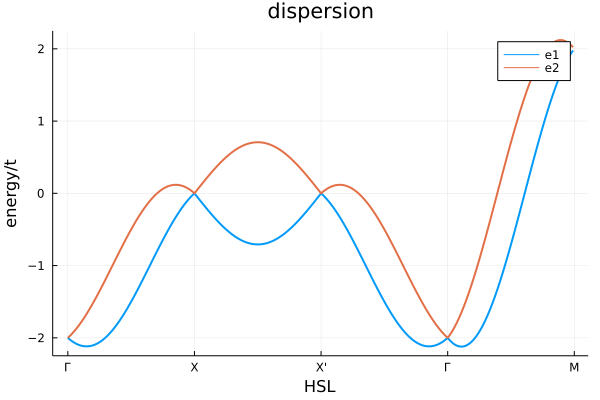

In [39]:

using Plots
plot(read_data[:,1], read_data[:,2], xticks=([0,pi,2pi,3pi,4pi],["Γ", "X", "X'", "Γ", "M"]),xlabel="HSL",ylabel="energy/t",label="e1",title="dispersion", width=2.0)
plot!(read_data[:,1], read_data[:,3],label="e2", width=2.0)

次に２次元BZ上の分散を計算し、plotしてみよう。
(gnuplotみたいに上手くplot出来ない。。改善の余地あり。)

In [5]:
ee1 = zeros(s*s)
ee2 = zeros(s*s)
b = collect(-pi:2pi/s:pi)

for x = 1:s
    for y = 1:s
        kx = b[x]
        ky = b[y]
        e,v = eigen(Ham([kx,ky]))
        ee1[(x-1)*s+y] = e[1]
        ee2[(x-1)*s+y] = e[2]
    end
end

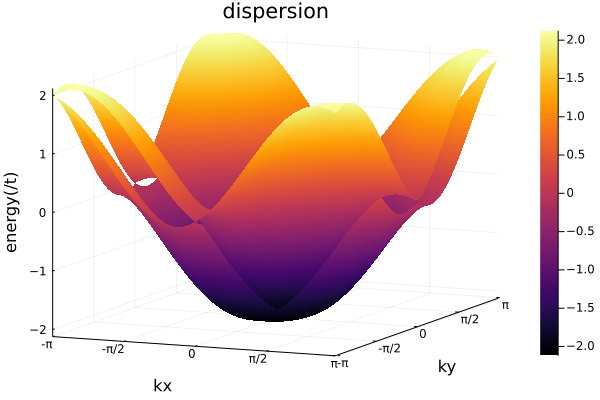

In [6]:
#p1 = wireframe(b, b, ee1, title="e1",color="blue")
#p2 = wireframe(b, b, ee2, title="e2")
plot(b,b,ee1,st=:surface, xticks=([-pi,-pi/2,0,pi/2,pi],["-$pi", "-$pi/2", "0", "$pi/2", "$pi"]), yticks=([-pi,-pi/2,0,pi/2,pi],["-$pi", "-$pi/2", "0", "$pi/2", "$pi"]),xlabel="kx",ylabel="ky",zlabel="energy(/t)",label="e1",title="dispersion")
plot!(b,b,ee2,st="surface")
#plot!(p2,label="e2")

## 3. Green関数を使って物理量を計算してみよう

さて次はGreen関数を使って物理量を計算してみよう。
ここではまず、Fermi面のDOSのプロットをしてみた後に、線形の伝導度について計算をしてみる。

線形の伝導度については、まず半古典Boltzmann方程式を用いた式で数値計算を行い、その後Green関数を用いた式でも計算を行ってみる。ここから少しだけコードもレベルアップします。

「構造体」と呼ばれるものを新しく使います。１つの構造体の中に、いくつかの変数や配列、関数を保持させることが出来ます。

こいつを使うメリットとして、
1. コードがすっきりして読みやすい。
2. 直観的に分かりやすい
3. 多変数の関数を定義するときに、すっきり書くことが出来る。また変数の数を変える時に対応力が高い。

が挙げられると思います。"struct"は一度定義したら変更しないもの、"mutable struct"は後で値を弄る可能性があるものです。

In [1]:
using LinearAlgebra

#ハミルトニアンのパラメータを内包する構造体。パラメーターを振って物理量を計算しグラフを書くときはmutableにした方が良いかも。
struct Parm
    #「(パラメータの名前)::どんな変数か」を明記する。「::」以下は書かなくてもいいが、書いた方が自分も分かりやすいし実行速度が上がる。
    #「Float64」は「実数」の意味。「Int」は整数。
    t::Float64
    lamda::Float64
    M::Float64
    mu::Float64
    eta::Float64
    T::Float64
    W_MAX::Float64
    K_SIZE::Int
    W_SIZE::Int
end

#ハミルトニアン及びそこから派生して速度演算子を内包する構造体
mutable struct Hamiltonian
    #「ComplexF64」は実部・虚部がFloat64の複素数の意味。
    #Array{type,N}で「要素がtypeのN次元配列」という意味。
    #二次元配列(複素行列)であることを明記
    Hk::Array{ComplexF64,2}
    Vx::Array{ComplexF64,2}
    Vy::Array{ComplexF64,2}
    Vxx::Array{ComplexF64,2}
    Vyx::Array{ComplexF64,2}
    #後々非エルミートに拡張できるようにComplexF64にしているが、別にFloat64でも良いはず
    E::Array{ComplexF64,1}
end

#遅延及び先進グリーン関数を内包する構造体
mutable struct Green
    GR::Array{ComplexF64,2}
    GA::Array{ComplexF64,2}
    dGR::Array{ComplexF64,2}
    dGA::Array{ComplexF64,2}
end

次に構造体の中身に値を入れる用の関数を作っておく。以下のコードを見ると気付くと思うが、本来ならば、関数の変数の分だけ「()」の中に書かないといけないのだが、構造体を作っておくことにより、「p::Parm」とか、「H::Hamiltonian」と書くだけで中身の値を全て渡してくれる。これが構造体を使う事のメリットの一つである。

構造体の中身は「p.t」のように、構造体の名前(ここではp)の後に「.~」とする事で取り出せる。

In [2]:
function HandV(k::Array{Float64},p::Parm)
    H::Array{ComplexF64,2} = [-p.t*(cos(k[1])+cos(k[2]))+p.mu+p.M p.lamda*(-sin(k[2])-im*sin(k[1]))
    p.lamda*(-sin(k[2])+im*sin(k[1])) -p.t*(cos(k[1])+cos(k[2]))+p.mu-p.M]

    Vx::Array{ComplexF64,2} = [p.t*(sin(k[1])) p.lamda*(-im*cos(k[1]))
    p.lamda*(im*cos(k[1])) p.t*(sin(k[1]))]

    Vy::Array{ComplexF64,2} = [p.t*(sin(k[2])) p.lamda*(-cos(k[2]))
    p.lamda*(-cos(k[2])) p.t*(sin(k[2]))]

    Vxx::Array{ComplexF64,2} = [p.t*(cos(k[1])) p.lamda*(im*sin(k[1]))
    p.lamda*(-im*sin(k[1])) p.t*(cos(k[1]))]

    Vyx::Array{ComplexF64,2} = [0.0 0.0
    0.0 0.0]

    E::Array{ComplexF64,1} = zeros(2)

    return H, Vx, Vy, Vxx, Vyx, E 
end

function Gk(w::Float64, p::Parm, Ham::Hamiltonian)
    #Matrix{Complex{Float64}}(w*I,2,2)で単位行列にwをかけた行列となる
    GR0::Array{ComplexF64,2} = -Ham.Hk + Matrix{Complex{Float64}}(w*I,2,2) + p.eta*Matrix{Complex{Float64}}(1.0im*I,2,2)
    #Juliaのおしゃれポイントの一つだが、「'」を付けるとエルミート共役を取ってくれる。
    #GA0 = GR0'
    GR::Array{ComplexF64,2} = inv(GR0)
    GA::Array{ComplexF64,2} = GR'
    #ここで書いているのはfreeな場合。最終的にはjuliaのもつ自動微分のライブラリを使って計算すると良い
    #juliaだと行列の演算も「＊」と書くだけで良いので便利である。
    dGR::Array{ComplexF64,2} = - GR * GR
    dGA::Array{ComplexF64,2} = - GA * GA
    return GR, GA, dGR, dGA
end

Gk (generic function with 1 method)

### 3.1 Fermi面のDOSを計算してみよう

Fermionの多体系においては、Fermi面(Fermi energy)が状態の占有・非占有の境界であり、そこで最も散乱・相互作用が起きやすい。(占有状態からほとんどエネルギーを変えずに非占有の状態に移れるため。)

僕は別に超伝導に関してそんなに知らないのだけれど、例えば超伝導のペアリングポテンシャル等を計算する時に、フェルミ面の形(Fermi energyでのBZ上でのDOS(Density of state)の分布)が特に重要になってくる。
また他には、Fermi面でのネスティングベクトルを知ることにより、低温で誘起されるであろう磁性をある程度予想することもできる。

ある波数$k$におけるDOSはスペクトル関数によって表現され、スペクトル関数はGreen関数の虚部から得られる。すなわち、
$$
A(k,\omega) = -\frac{1}{\pi} Im[G^R(k,\omega)]
$$
であり、特にフェルミ面でのDOSは$A(k,\epsilon_F)$を計算すればよい。

In [4]:
# 「p」という名前で「Parm」タイプの構造体を、初期値(~,~,~)で作る
# t, lamda, M, mu(e_F), eta, T, W_MAX, K_SIZE, W_SIZE
p = Parm(1.0,0.5,0.0,0.0,0.05,0.05,0.2,300,2)

kx = collect(Float64,-pi:2*pi/p.K_SIZE:pi)
ky = collect(Float64,-pi:2*pi/p.K_SIZE:pi)

#spectral関数を格納する配列
Ak = zeros(p.K_SIZE,p.K_SIZE)

for x = 1:p.K_SIZE
    for y = 1:p.K_SIZE
        kk = [kx[x],ky[y]]
        # Juliaで複数の値を返す関数を用いると、値をTupleの形で返すので、それを構造体の初期値に代入する場合「...」が後ろに必要（Tupleのアンパックをしている）
        Hamk = Hamiltonian(HandV(kk,p)...)
        G = Green(Gk(p.mu,p,Hamk)...)
        #Ak[(x-1)*p.K_SIZE+y] = -imag(tr(G.GR))
        Ak[x,y] = -imag(tr(G.GR))/pi
    end
end


プロットしてみる(colorbarのtitleの場所と向きが全然気に食わない。。誰か知ってる方は修正お願いします。)

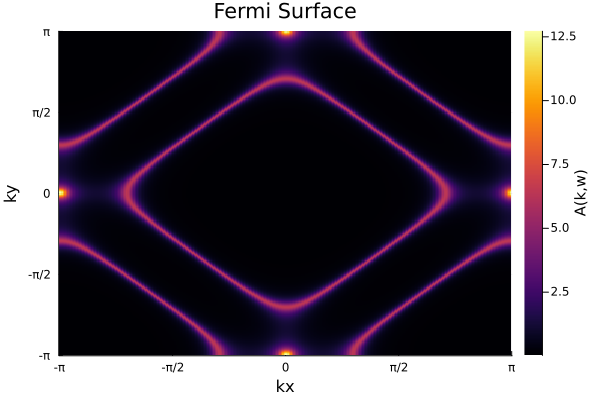

In [4]:
#using PyPlot
using Plots
plot(kx,ky,Ak,st=:heatmap, xticks=([-pi,-pi/2,0,pi/2,pi],["-$pi", "-$pi/2", "0", "$pi/2", "$pi"]), yticks=([-pi,-pi/2,0,pi/2,pi],["-$pi", "-$pi/2", "0", "$pi/2", "$pi"]),xlabel="kx",ylabel="ky",colorbar_title="A(k,w)",title="Fermi Surface")

### 3.2 伝導度を計算してみる(半古典Boltzmann)

次に伝導度を計算してみよう。まずはGreen関数を用いずにsemi-classical Boltzman方程式で計算してみた後、Green関数によっても計算を行ってみる。

Green関数による計算では$\omega$積分も実行するので、これまでよりは時間がかかるが、教育上の配慮から5分以内くらいで数値計算の実行が終わるようにしている。

これも覚えておいて欲しいが、最初のデバッグ段階や大体どんな感じの結果が期待されるかを調べるための数値計算の段階では、数値計算の精度よりも計算時間を短くして色々調べられるようにするのがオススメである。最後に論文にする前の段階で、もう一度精度も気にして一気に計算をしてしまう方が、結果的に早い事の方が多い。（バグを含んでいるのに時間のかかる計算を回していては、結果的に無駄になる時間が多くなってしまう。横着をしてはいけない。）

行列やテンソル計算を行う際に、便利なので、アインシュタインの縮約が取れるパッケージを追加しておく
（Einsum使ったコードが上手く動かなかったのでいつか加筆します。便利だとは思うので、誰か知っている人が居たら加筆してください。）

In [ ]:
import Pkg
using Pkg
Pkg.add("Einsum")

In [31]:
A = [1.0+2.0im 0 0; 2.0 3.0 0; 2.0 5.0 1.0]
C = [2.0,1.0,1.0]
@einsum B[i] := real(A[i,j] * A[j,i]) * C[j]

3-element Vector{ComplexF64}:
 -6.0 + 0.0im
  9.0 + 0.0im
  1.0 + 0.0im

半古典論による線形の伝導度計算の関数を定義。
ホール伝導度とかも計算してみたいので、ハミルトニアンを新しいものを用意。

In [3]:
#using Einsum

#band-indexの基底でHamiltonian及び速度演算子を定義しなおす
function HV_BI(H::Hamiltonian)

    H.E, BI::Array{ComplexF64,2} = eigen(H.Hk)
    Vx_BI::Array{ComplexF64,2} = BI' * H.Vx * BI
    Vy_BI::Array{ComplexF64,2} = BI' * H.Vy * BI
    Vxx_BI::Array{ComplexF64,2} = BI' * H.Vxx * BI
    Vyx_BI::Array{ComplexF64,2} = BI' * H.Vyx * BI

    H.Vx = Vx_BI
    H.Vy = Vy_BI
    H.Vxx = Vxx_BI
    H.Vyx = Vyx_BI
end

f(e,T) = 1.0/(1.0+exp(e/T))
df(e,T) = -1.0/(1.0+exp(e/T))/(1.0+exp(-e/T))/T

#semi-classical Boltzmann

function SCB_LR(p::Parm, H_BI::Hamiltonian)
    Drude::Float64 = 0.0
    QH::Float64 = 0.0
    for i = 1:length(H_BI.E)
        Drude += -real(H_BI.Vx[i,i] * H_BI.Vx[i,i] * df(H_BI.E[i],p.T)) / (2.0*p.eta)
        for j = 1:length(H_BI.E)
            if(i != j)
                QH += imag((H_BI.Vy[i,j]*H_BI.Vx[j,i]-H_BI.Vx[i,j]*H_BI.Vy[j,i])/((H_BI.E[i]-H_BI.E[j])^2 + p.eta^2)) * real(f(H_BI.E[i],p.T)) 
            end
        end
    end
    #@einsum Drude := -real(H_BI.Vx[i,i] * H_BI.Vx[i,i] * df(H_BI.E[i],p.T)) / (2.0*p.eta)
    #@einsum BC[i]::Float64 := imag(H_BI.Vy[i,j]*H_BI.Vx[j,i]/((H_BI.E[i]-H_BI.E[j])^2 + p.eta^2))
    #@einsum QH::Float64 := real(BC[i] * f(H_BI.E[i],p.T))
    return Drude, QH
end





SCB_LR (generic function with 1 method)

先ほどの模型で線形の伝導度を計算してみよう。伝導度のBZ上での分布が見たければ、二次元配列に結果を格納して、「using Statistics; sum()」を使うとより速い＆綺麗かもしれない。

In [6]:
# t, lamda, M, mu(e_F), eta, T, W_MAX, K_SIZE, W_SIZE
p = Parm(1.0,0.5,0.0,0.0,0.05,0.05,0.2,300,2)

Dr = 0.0
QHE = 0.0
for x = 1:p.K_SIZE
    for y = 1:p.K_SIZE
        kk = [kx[x],ky[y]]
        Hamk_BI = Hamiltonian(HandV(kk,p)...)
        HV_BI(Hamk_BI)
        d, q = SCB_LR(p,Hamk_BI)
        Dr += d/(p.K_SIZE^2)
        QHE += q/(p.K_SIZE^2)
    end
end

println("Drude = $(Dr), QHE = $(QHE)")

Drude = 3.7516510257431572, QHE = -2.6553344496843224e-19


次にチャーン絶縁体の模型において、ホール伝導度が量子化する事を確かめてみよう。

In [6]:

function HandV_topo(k::Array{Float64},p::Parm)
    H::Array{ComplexF64,2} = [-p.t*(cos(k[1])+cos(k[2])-2.0)+p.mu+p.M p.lamda*(-sin(k[1])-im*sin(k[2]))
    p.lamda*(-sin(k[1])+im*sin(k[2])) p.t*(cos(k[1])+cos(k[2])-2.0)+p.mu-p.M]

    Vx::Array{ComplexF64,2} = [p.t*(sin(k[1])) p.lamda*(-cos(k[1]))
    p.lamda*(-cos(k[1])) -p.t*(sin(k[1]))]

    Vy::Array{ComplexF64,2} = [p.t*(sin(k[2])) p.lamda*(-im*cos(k[2]))
    p.lamda*(im*cos(k[2])) -p.t*(sin(k[2]))]

    Vxx::Array{ComplexF64,2} = [p.t*(cos(k[1])) p.lamda*(sin(k[1]))
    p.lamda*(sin(k[1])) -p.t*(cos(k[1]))]

    Vyx::Array{ComplexF64,2} = [0.0 0.0
    0.0 0.0]

    E::Array{ComplexF64,1} = zeros(2)

    return H, Vx, Vy, Vxx, Vyx, E 
end


HandV_topo (generic function with 1 method)

上記の模型で磁場の強さを変化させていくとトポロジカル転移が起きるので、以下のようなコードを書く。

In [7]:
#Vectorは後から要素を足していく時に用いる。(逆に消すこともできる。)可変長配列と考えてよい。今回の場合は、磁場のパラメーターを振る場合の刻みをこの時点で決めていないため、このように書いて、後から計算した伝導度の値を入れていく。
M_topo = Vector{Float64}(undef,0)
Dr_topo = Vector{Float64}(undef,0)
QHE_topo = Vector{Float64}(undef,0)

QH_k = zeros(p.K_SIZE,p.K_SIZE)

for M = collect(-2.0:0.1:1.0)
    #「push!(A,B)」で「A」というVectorに「B」という要素を追加する。 
    push!(M_topo,M)
    # t, lamda, M, mu(e_F), eta, T, W_MAX, K_SIZE, W_SIZE
    p1 = Parm(0.4, 1.0, M, 0, 0.002, 0.002, 1.0, 300, 10)
    
    Dr1 = 0.0
    QHE1 = 0.0
    for x = 1:p1.K_SIZE
        for y = 1:p1.K_SIZE
            kk = [kx[x],ky[y]]
            Hamk_BI = Hamiltonian(HandV_topo(kk,p1)...)
            HV_BI(Hamk_BI)
            d, q = SCB_LR(p1,Hamk_BI)
            Dr1 += d/(p.K_SIZE^2)
            QHE1 += q/(p.K_SIZE^2)
            if(M==-1.0)
                QH_k[x,y] = q
            end
        end
    end
    #計算した結果をpushでVectorに格納していく。
    push!(Dr_topo,Dr1)
    push!(QHE_topo,QHE1)
end

教育のためマルチプロットとかも使ってみる。Gapが閉じる点(Drude項が有限になる点)でトポロジカル転移が生じ、ホール伝導度が変化する事が見て取れる。

ちなみにこういうplot点がO(10)くらいの時は、数値計算したパラメーターをちゃんとポイント表示する事をお勧めする。(線だけで書くとどのくらいプロットが細かくてどれくらい信じてよいかが分かり辛いため、ポイント表示した方が誠実である。)

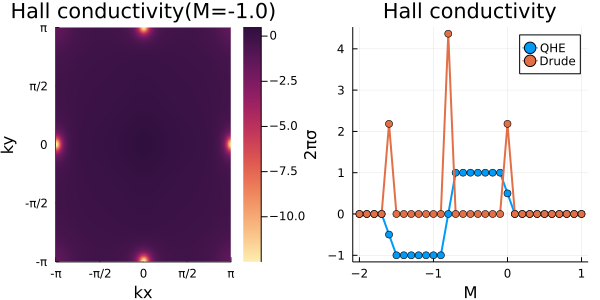

In [17]:
using Plots

f1 = plot(kx,ky,QH_k,st=:heatmap,color=:matter, xticks=([-pi,-pi/2,0,pi/2,pi],["-$pi", "-$pi/2", "0", "$pi/2", "$pi"]), yticks=([-pi,-pi/2,0,pi/2,pi],["-$pi", "-$pi/2", "0", "$pi/2", "$pi"]),xlabel="kx",ylabel="ky",title="Hall conductivity(M=-1.0)")
f2 = plot(M_topo, 2pi*QHE_topo, label="QHE",xlabel="M",ylabel="2πσ",title="Hall conductivity", width=2.0, marker=:circle)
f2 = plot!(M_topo, 2pi*Dr_topo,label="Drude", width=2.0,  marker=:circle)
plot(f1,f2,layout=(1,2),size=(600,300))
#plot!(M_topo, Dr_topo,label="Drude", width=2.0)

## 3.3 伝導度を計算してみる(Green関数)

次にGreen関数による計算を行ってみよう。ここで構造体のありがたみが分かると思う。

In [7]:
function Green_LR(p::Parm, H::Hamiltonian)
    Drude::Float64 = 0.0
    QH::Float64 = 0.0

    for w = collect(Float64,-p.W_MAX:2*p.W_MAX/p.W_SIZE:p.W_MAX)
        G = Green(Gk(w,p,H)...)
        Drude += 2.0p.W_MAX*real(tr(H.Vx*G.GR*H.Vx*(G.GR - G.GA))*df(w,p.T)/p.W_SIZE)/(2.0pi)
        QH += 4.0p.W_MAX*real(tr(H.Vy*G.dGR*H.Vx*(G.GR - G.GA))*f(w,p.T)/p.W_SIZE)/(2.0pi)
    end
    return Drude, QH
end

Green_LR (generic function with 1 method)

先ほどのトポロジカル相転移の模型で、量子化されたホール伝導度が、不純物の効果($\eta$の大きさ)でどのようになまっていくのかを確認してみよう。

In [11]:
#eta_G = Vector{Float64}(undef,0)
#Dr_G = Vector{Float64}(undef,0)
#QHE_G = Vector{Float64}(undef,0)

p1 = Parm(0.4, 1.0, -1.0, 0, 0.01, 0.005, 2.0, 300, 1000)
Dr1 = 0.0
QHE1 = 0.0
for x = 1:p1.K_SIZE
    for y = 1:p1.K_SIZE
        kk = [kx[x],ky[y]]
        Hamk = Hamiltonian(HandV_topo(kk,p1)...)
        d, q = Green_LR(p1,Hamk)
        Dr1 += d/(p.K_SIZE^2)
        QHE1 += q/(p.K_SIZE^2)
    end
end
println("Drude = $(Dr1), QHE = $(QHE1)")
#=
for eta = collect(0.01:0.01:0.1)
    #「push!(A,B)」で「A」というVectorに「B」という要素を追加する。 
    push!(eta_G,eta)
    # t, lamda, M, mu(e_F), eta, T, W_MAX, K_SIZE, W_SIZE
    p1 = Parm(0.4, 1.0, -1.0, 0, eta, 0.005, 2.0, 300, 1000)
    
    Dr1 = 0.0
    QHE1 = 0.0
    for x = 1:p1.K_SIZE
        for y = 1:p1.K_SIZE
            kk = [kx[x],ky[y]]
            Hamk = Hamiltonian(HandV_topo(kk,p1)...)
            d, q = Green_LR(p1,Hamk)
            Dr1 += d/(p.K_SIZE^2)
            QHE1 += q/(p.K_SIZE^2)
        end
    end
    #計算した結果をpushでVectorに格納していく。
    push!(Dr_G,Dr1)
    push!(QHE_G,QHE1)
end
=#

Drude = 0.00042671282155371394, QHE = 0.12499320796278908


## 3.4 並列化をしてみよう(スレッド並列)

**今回の数値計算だと、スレッド並列ではあまり速度は伸びません。ですので読み飛ばしても大丈夫です**

とはいえ1パラメータでの計算に４分半かかっていると、例えばeta依存性などをプロットしたい場合、プロット点が20だと１時間半かかってしまう。

論文に載せる図を作る最終段階でそれくらい時間がかかるのは別に問題ではない(というか最終段階なら別に精度をもっと上げて２日かかっても問題ない)が、結果の概観を調べる時はそれだと時間がかかり過ぎである。

よって、ある程度の精度を保証しつつ、実行速度を上げる方法として並列化が挙げられる。普段PCで色んなアプリケーションを作動しながら作業が出来ているのはPCがそれらを並列処理しているからなのだが、ざっくり言うと、それを数値計算の中でもやってしまおう、という事である。

Jupyter Notebookで並列計算を行う場合は、並列計算を行う用のカーネルを作る必要がある。（僕のワークステーションは32コア64スレッドあるので、50スレッド並列にしてみました。自分のPCで何スレッド並列出来るのかは[このサイト](https://xn--hayakute-py4gndyc1x.kantan-sakusaku.com/?p=1671)とかの方法で確認。）

例えば64スレッド並列まで可能で、パンパンに64並列すると実行している時に、PCの挙動がカクカクするので若干余裕を持たせておくことをお勧めする。

In [12]:
using IJulia
installkernel("Julia (4 threads)", specname="julia-4-threads", env=Dict("JULIA_PROJECT"=>"@.", "JULIA_NUM_THREADS"=>"4"))

┌ Info: Installing Julia (4 threads) kernelspec in C:\Users\Michishita\AppData\Roaming\jupyter\kernels\julia-4-threads-1.6
└ @ IJulia C:\Users\Michishita\.julia\packages\IJulia\e8kqU\deps\kspec.jl:94


"C:\\Users\\Michishita\\AppData\\Roaming\\jupyter\\kernels\\julia-4-threads-1.6"

上記のコードを実行した後に、一度VScodeを閉じて再び立ち上げ、右上のカーネルの選択(Julia 1.6.2(最新版だと1.7.0?)とか書いてあるところ)を押す。
そしてカーネルの選択で「Julia (50threads) 1.6.2」を選択する。これで50並列計算まで可能なJupyter Notebookが立ち上がった。以下のコマンドで一応確認。

In [8]:
Threads.nthreads()

20

ちゃんと50になっている。
ただこれだけでは、並列処理をしてくれない。ここでは最も簡単な並列化の仕方だけ行う。
それは「forループの前に``Threads.@threads``」を付けるだけで良い。

ただし、メモリがそれぞれの並列スレッドで共有されているので、``Threads.@threads``の前に定義した変数・配列に並列処理内で書き込むと「書き込みの競合」が発生し、バグが生じることに注意である。今回はそれを避けるために、「あらかじめ配列を用意しておいて、並列処理内で各要素に書き込む」という手段を取る。この場合、並列処理内で書き込もうとする要素はそれぞれ異なるので、競合は発生しない。

具体的に以下のコードを観てみよう。

（追記）
Juliaのマルチスレッド(スレッド並列)は、どうやらあまり速くならない事が多いらしいので、ここでは高速化は諦めて、次のtutorial2.ipynbにて、「マルチプロセス」で並列化を学習していこう。

In [9]:
using BenchmarkTools
using Base.Threads

In [11]:
#一旦確認のためK_SIZE=50とかにしておく
p1 = Parm(0.4, 1.0, -1.0, 0, 0.01, 0.005, 2.0, 300, 1000)
Dr0 = 0.0
QHE0 = 0.0
#ここで並列処理用に配列を用意しておく
Dr1 = zeros(Float64,p1.K_SIZE)
QHE1 = zeros(Float64,p1.K_SIZE)
@threads for x = 1:p1.K_SIZE
    #ちゃんと並列化されてるかの確認。何番目のスレッドで実行しているかを出力
    #if(x%50==0)
    #    println("Thread = $(threadid())")
    #end
    for y = 1:p1.K_SIZE
        kk = [kx[x],ky[y]]
        Hamk = Hamiltonian(HandV_topo(kk,p1)...)
        d, q = Green_LR(p1,Hamk)
        Dr1[x] += d/(p.K_SIZE^2)
        QHE1[x] += q/(p.K_SIZE^2)
    end
end
#ここで２度手間に見えるかもしれないが、ただの足し算の実行をするだけなので時間はほとんどかからない
for x = 1:p1.K_SIZE
    Dr0 += Dr1[x]
    QHE0 += QHE1[x]
end
println("Drude = $(Dr0), QHE = $(QHE0)")

Drude = 0.00042671282155371323, QHE = 0.12499320796278998
